### Read Excel file in Pandas

In [4]:
import pandas as pd
data=pd.read_csv("titanic.csv")

In [7]:
type(data)                      #type dataframe 


pandas.core.frame.DataFrame

In [11]:
data.info()  #shows info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Desc         891 non-null    object 
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [13]:
data.describe() # takes numeric columns and provide descriptive statistical analysis of the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data.head()        #shows first 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,Adult,0,0,373450,8.0500,NaN,S


In [18]:
data.tail()   #prints last 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,Adult,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,Teen,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,Child,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,Adult,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,Adult,0,0,370376,7.75,NaN,Q


## Drop data  

In [70]:
dataset =data.drop(['Cabin','Parch','Ticket','PassengerId'],axis=1 )  #specify name of column  #if >50% of NaN values in a table drop the column
#drop a column using axis =1 -> return a new dataframe object

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Desc      891 non-null    object 
 6   SibSp     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [45]:
tmp=dataset.dropna()   #drop all null values when nothing ()

In [46]:
tmp.head(7)

,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,Adult,1,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adult,1,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,Adult,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adult,1,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,Adult,0,8.0500,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,Adult,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,Child,3,21.0750,S


### Filling Missing Values

##### check the range of values or check the distribution if normal use mean or use mode when skewed

In [50]:
dataset['Age']=dataset['Age'].fillna(round(dataset['Age'].mean(),2)) 
#Try to avoid loops  in pandas as functions are already available.
#mean function ignores null values 

In [52]:
dataset.head(7)

,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,Adult,1,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,Adult,1,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,Adult,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,Adult,1,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,Adult,0,8.0500,S
5,0,3,"Moran, Mr. James",male,29.699118,Teen,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,Adult,0,51.8625,S


In [72]:
#Group as in description
dataset['Age'].fillna(round(dataset[dataset['Desc']=='Adult']['Age'].mean(),2))

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    34.98
889    26.00
890    32.00
Name: Age, Length: 891, dtype: float64

In [67]:
dataset.head(19)

,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Fare,Embarked,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,Adult,1,7.2500,S,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,Adult,1,71.2833,C,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,Adult,0,7.9250,S,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,Adult,1,53.1000,S,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
4,0,3,"Allen, Mr. William Henry",male,35.000000,Adult,0,8.0500,S,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
5,0,3,"Moran, Mr. James",male,29.699118,Teen,0,8.4583,Q,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,Adult,0,51.8625,S,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,Child,3,21.0750,S,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,Adult,0,11.1333,S,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,Teen,1,30.0708,C,22.0,...,57.0,80.0,70.0,24.5,6.0,0.67,30.5,0.42,34.5,74.0


In [73]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Desc      891 non-null    object 
 6   SibSp     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [79]:
gp=dataset.groupby(['Sex','Desc'])    #do not return dataframe

In [80]:
gp['Age'].mean()    #Mean computed 

Sex     Desc 
female  Adult    34.467742
        Child     4.796875
        Teen     16.779070
male    Adult    35.245879
        Child     4.747838
        Teen     17.576923
Name: Age, dtype: float64

In [93]:
gp.get_group(('male','Child'))     # return data frame containing gender male and desc child can also be done via boolean indexing

,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Fare,Embarked
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,Child,3,21.0750,S
16,0,3,"Rice, Master. Eugene",male,2.00,Child,4,29.1250,Q
50,0,3,"Panula, Master. Juha Niilo",male,7.00,Child,4,39.6875,S
59,0,3,"Goodwin, Master. William Frederick",male,11.00,Child,5,46.9000,S
63,0,3,"Skoog, Master. Harald",male,4.00,Child,3,27.9000,S
65,1,3,"Moubarek, Master. Gerios",male,NaN,Child,1,15.2458,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,Child,0,29.0000,S
125,1,3,"Nicola-Yarred, Master. Elias",male,12.00,Child,1,11.2417,C
159,0,3,"Sage, Master. Thomas Henry",male,NaN,Child,8,69.5500,S
164,0,3,"Panula, Master. Eino Viljami",male,1.00,Child,4,39.6875,S


In [98]:
## Transform function   ... to putback data to dataframe transform takes func as arg 
dataset['Age']=gp['Age'].transform(lambda k:k.fillna(k.mean()))## PAss gp['Age'] as arg to lambda fn ..

In [94]:
add=lambda x,y: x+y      #Anonymous function.
add(1,2)

3

In [99]:
dataset.tail()

,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.000000,Adult,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,Teen,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4.796875,Child,1,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,Adult,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.000000,Adult,0,7.75,Q


In [104]:
dataset.info()
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   Desc      889 non-null    object 
 6   SibSp     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 69.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   Desc      889 non-null

###### Outliers

In [106]:
## Box Plot used for outlier detections
col=['Pclass','Fare']

In [108]:
df=dataset[col]

In [110]:
df                      #contain only 2 col

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


In [113]:
g1=df.groupby("Pclass")

1         AxesSubplot(0.1,0.559091;0.363636x0.340909)
2    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
3             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

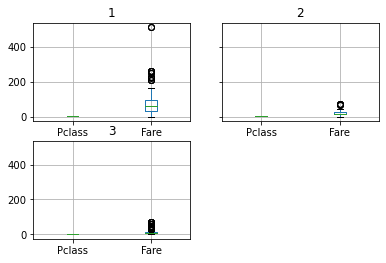

In [115]:
g1.boxplot()    #whisker defines boundaries

                # q2 median values find q1,q3 value
                #find interquantile range(iqr) ==(q3-q1)
                #1.5*iqr 
                #lower threshold(Lower Whisker)=q1-(1.5*iqr)
                #Upper Whisker =q3+(1.5*iqr)

In [124]:
def iqr(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    return iqr,q1,q3

In [143]:
iqr,q1,q3=iqr(g1,'Fare')


TypeError: 'Series' object is not callable

In [133]:
l_whis=q1-1.5*iqr
u_whis=q3+1.5*iqr

In [136]:
df[df['Fare']>l_whis& df['Fare']<upper]


TypeError: unsupported operand type(s) for &: 'float' and 'float'